23:37:53 INFO    opendrift:576: OpenDriftSimulation initialised (version 1.14.6)
23:37:53 INFO    opendrift.models.basemodel.environment:203: Adding a global landmask from GSHHG
23:37:53 INFO    opendrift.models.basemodel.environment:227: Fallback values will be used for the following variables which have no readers: 
23:37:53 INFO    opendrift.models.basemodel.environment:230: 	x_sea_water_velocity: 0.000000
23:37:53 INFO    opendrift.models.basemodel.environment:230: 	y_sea_water_velocity: 0.000000
23:37:53 INFO    opendrift.models.basemodel.environment:230: 	sea_surface_height: 0.000000
23:37:53 INFO    opendrift.models.basemodel.environment:230: 	sea_surface_wave_significant_height: 0.000000
23:37:53 INFO    opendrift.models.basemodel.environment:230: 	sea_ice_area_fraction: 0.000000
23:37:53 INFO    opendrift.models.basemodel.environment:230: 	x_wind: 0.000000
23:37:53 INFO    opendrift.models.basemodel.environment:230: 	y_wind: 0.000000
23:37:53 INFO    opendrift.models.basemodel

--------------------
Reader performance:
--------------------
global_landmask
 0:00:00.0  total
 0:00:00.0  preparing
 0:00:00.0  reading
 0:00:00.0  masking
--------------------
https://thredds.met.no/thredds/dodsC/cmems/topaz6/dataset-topaz6-arc-15min-3km-be.ncml
 0:00:42.5  total
 0:00:00.0  preparing
 0:00:42.3  reading
 0:00:00.1  interpolation
 0:00:00.0  interpolation_time
 0:00:00.2  rotating vectors
 0:00:00.0  masking
--------------------
https://thredds.met.no/thredds/dodsC/mepslatest/meps_lagged_6_h_latest_2_5km_latest.nc
 0:00:34.1  total
 0:00:00.0  preparing
 0:00:34.0  reading
 0:00:00.9  interpolation
 0:00:00.0  interpolation_time
 0:00:00.1  rotating vectors
 0:00:00.0  masking
--------------------
Performance:
 1:26.0 total time
    0.2 configuration
    0.0 preparing main loop
      0.0 moving elements to ocean
 1:25.7 main loop
      2.4 updating elements
        2.3 vertical mixing
    0.0 cleaning up
--------------------
Model:	PelagicEggDrift     (OpenDrift ver

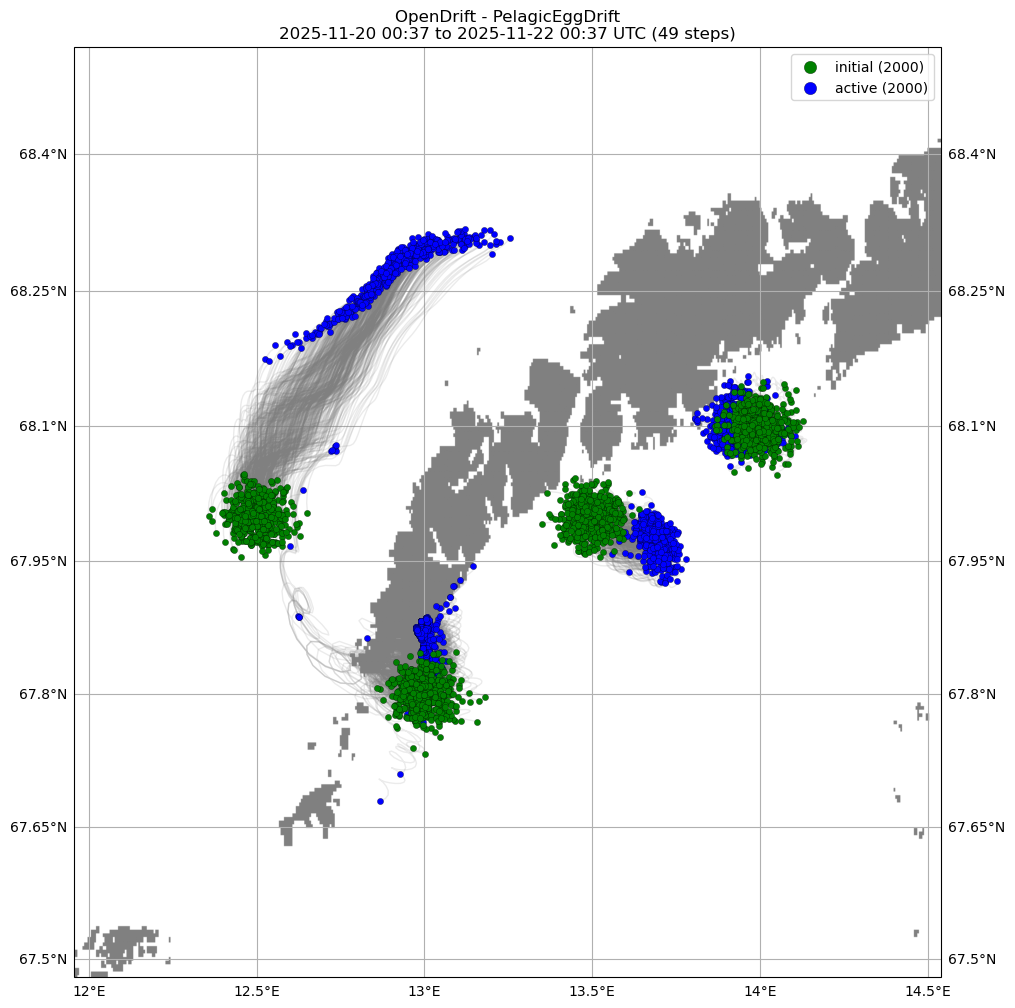

23:39:25 WARNING opendrift:2469: Plotting fast. This will make your plots less accurate.
23:39:26 INFO    opendrift:3107: Preparing animation for notebook....


23:40:02 INFO    opendrift:3080: Time to make animation: 0:00:36.067792
23:40:02 INFO    opendrift:3107: Preparing animation for notebook....


23:40:13 INFO    opendrift.models.oceandrift:643: Time to make animation: 0:00:11.403131


In [73]:
#!/usr/bin/env python
"""
Cod egg
=============
"""

from opendrift.readers import reader_netCDF_CF_generic
from opendrift.models.pelagicegg import PelagicEggDrift
from datetime import datetime, timedelta

o = PelagicEggDrift(loglevel=20)  # Set loglevel to 0 for debug information

# Forcing with Topaz ocean model and MEPS atmospheric model
o.add_readers_from_list([
    'https://thredds.met.no/thredds/dodsC/cmems/topaz6/dataset-topaz6-arc-15min-3km-be.ncml',
    'https://thredds.met.no/thredds/dodsC/mepslatest/meps_lagged_6_h_latest_2_5km_latest.nc'])

#%%
# Adjusting some configuration
o.set_config('drift:vertical_mixing', True)
o.set_config('vertical_mixing:diffusivitymodel', 'windspeed_Sundby1983') # windspeed parameterization for eddy diffusivity
#%%
# Vertical mixing requires fast time step
o.set_config('vertical_mixing:timestep', 60.) # seconds

#%%
# spawn NEA cod eggs at defined position and time
time = datetime.now()
o.seed_elements(14. , 68.1, z=-40, radius=2000, number=500,
                time=time, diameter=0.0014, neutral_buoyancy_salinity=31.25)
o.seed_elements(12.5, 68., z=-40, radius=2000, number=500,
                time=time, diameter=0.0014, neutral_buoyancy_salinity=31.25)
o.seed_elements(13.5, 68., z=-40, radius=2000, number=500,
                time=time, diameter=0.0014, neutral_buoyancy_salinity=31.25)
o.seed_elements(13., 67.8, z=-40, radius=2000, number=500,
                time=time, diameter=0.0014, neutral_buoyancy_salinity=31.25)

#%%
# Running model
#o.run(duration=timedelta(hours=48), time_step=3600)
o.run(duration=timedelta(hours=48), time_step=3600, outfile='openoil.nc')

#%%
# Print and plot results.
# At the end the wind vanishes, and eggs come to surface
print(o)

o.plot(fast=True)
o.animation(fast=True, color='z')

#%%
# .. image:: /gallery/animations/example_codegg_0.gif

#%% Vertical distribution of particles
o.animate_vertical_distribution()

#%%
# .. image:: /gallery/animations/example_codegg_1.gif


In [ ]:
o.sa


rec.array([(-0.06162203,  0.0147433 , 0.5788157 , 0.9922569 , 0., -3.9096453, -5.0050297 , 0., 94.69991, 0.02, 50., 10., 34., 0., 0., 0., 0., 0.),
           (-0.05580242,  0.0097979 , 0.57561713, 1.8603104 , 0., -8.665472 , -0.7293569 , 0., 85.47756, 0.02, 50., 10., 34., 0., 0., 0., 0., 0.),
           (-0.05434033,  0.012369  , 0.5770833 , 2.2467954 , 0., -9.395667 , -1.7477428 , 0., 85.71256, 0.02, 50., 10., 34., 0., 0., 0., 0., 0.),
           ...,
           (-0.19300754, -0.02445272, 0.51261145, 0.7690013 , 0., -5.5883207, -0.17575645, 0., 70.43804, 0.02, 50., 10., 34., 0., 0., 0., 0., 0.),
           (-0.11591998, -0.02913108, 0.5059995 , 1.847972  , 0., -8.502849 , -1.6799983 , 0., 88.60747, 0.02, 50., 10., 34., 0., 0., 0., 0., 0.),
           (-0.19512652, -0.0026949 , 0.50735444, 0.19862872, 0.,  0.834806 , -2.716144  , 0., 75.34226, 0.02, 50., 10., 34., 0., 0., 0., 0., 0.)],
          dtype=[('x_sea_water_velocity', '<f4'), ('y_sea_water_velocity', '<f4'), ('sea_surface_heig

In [78]:
import xarray as xr
d = xr.open_dataset('openoil.nc', decode_coords=False)
# Requirement that status>=0 is needed since non-valid points are not masked in OpenDrift output
d = d.where(d.status>=0)  # only active particles
d

<xarray.Dataset> Size: 14MB
Dimensions:                              (trajectory: 2000, time: 49)
Coordinates:
  * trajectory                           (trajectory) int32 8kB 0 1 ... 1999
  * time                                 (time) datetime64[ns] 392B 2025-11-2...
Data variables: (12/32)
    status                               (trajectory, time) float64 784kB 0.0...
    moving                               (trajectory, time) float64 784kB 1.0...
    age_seconds                          (trajectory, time) float32 392kB 0.0...
    origin_marker                        (trajectory, time) float64 784kB 0.0...
    lon                                  (trajectory, time) float32 392kB 14....
    lat                                  (trajectory, time) float32 392kB 68....
    ...                                   ...
    sea_water_salinity                   (trajectory, time) float32 392kB 34....
    surface_downward_x_stress            (trajectory, time) float32 392kB 0.0...
    surface_downward_y_stress            (trajectory, time) float32 392kB 0.0...
    turbulent_kinetic_energy             (trajectory, time) float32 392kB 0.0...
    turbulent_generic_length_scale       (trajectory, time) float32 392kB 0.0...
    upward_sea_water_velocity            (trajectory, time) float32 392kB 0.0...
Attributes: (12/140)
    Conventions:                                                      CF-1.11...
    standard_name_vocabulary:                                         CF Stan...
    featureType:                                                      trajectory
    title:                                                            OpenDri...
    summary:                                                          Output ...
    keywords:                                                         traject...
    ...                                                               ...
    geospatial_lon_units:                                             degrees...
    geospatial_lon_resolution:                                        point
    runtime:                                                          0:01:26...
    geospatial_vertical_min:                                          -51.85017
    geospatial_vertical_max:                                          0.0
    geospatial_vertical_positive:                                     up